In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import os, glob
import libstempo as T2
from libstempo import toasim as LT
from libstempo import plot as LP
import enterprise
from enterprise.pulsar import Pulsar
from simFuncs import *

In [2]:
# get parfiles containing pulsar params
datadir = enterprise.__path__[0] + '/datafiles/mdc_open1/'
parfiles = sorted(glob.glob(datadir + '/*.par'))

In [3]:
# define observation times and duration
Tobs = 20.0 # years
deltaT = 20.0 # points per year
obstimes = 53000.0 + np.arange(0.0, Tobs*365.25, 365.25/20.0)
tref = obstimes[0]*86400.0

In [4]:
# create pulsar objects from parfiles
# default TOA errors are set to 0.4 microseconds
psrs = create_psrs(parfiles, obstimes=obstimes)

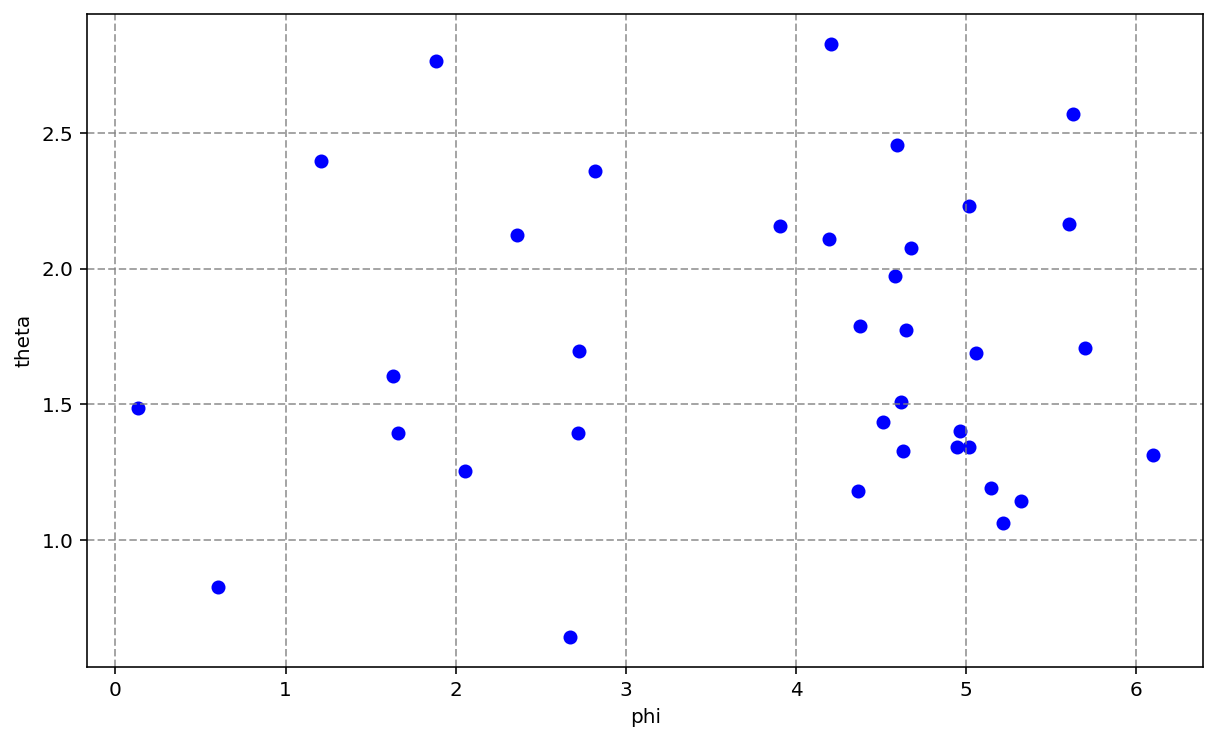

In [5]:
# plot pulsar locations for a nice visual :)
# need to convert to enterprise pulsars to get location params (irrelevant for the rest of the notebook)
Epsrs = [Pulsar(p) for p in psrs]

th = [p.theta for p in Epsrs]
ph = [p.phi for p in Epsrs]

fig = plt.figure(1, figsize=(10,6))
plt.scatter(ph, th, marker='o', color='b')
plt.grid(color='gray', ls='dashed', lw=1, alpha=0.7)
plt.xlabel('phi')
plt.ylabel('theta')
plt.show()

In [6]:
# create parameter dictionary for CW signal
# change params as needed
pdict = {'gwtheta': 1.75,
         'gwphi': 5.,
         'mc': 5e9,
         'dist': 60., 
         'fgw': 2e-8,
         'phase0': 0.0,
         'psi': np.pi/4.0,
         'inc': 0.0}

# add CW signal to our pulsars
add_cgw(psrs, pdict, tref)

J0030+0451
J0218+4232
J0437-4715
J0613-0200
J0621+1002
J0711-6830
J0751+1807
J0900-3144
J1012+5307
J1022+1001
J1024-0719
J1045-4509
J1455-3330
J1600-3053
J1603-7202
J1640+2224
J1643-1224
J1713+0747
J1730-2304
J1732-5049
J1738+0333
J1741+1351
J1744-1134
J1751-2857
J1853+1303
J1857+0943
J1909-3744
J1910+1256
J1918-0642
J1939+2134
J1955+2908
J2019+2425
J2124-3358
J2129-5721
J2145-0750
J2317+1439


In [ ]:
psrs[0].

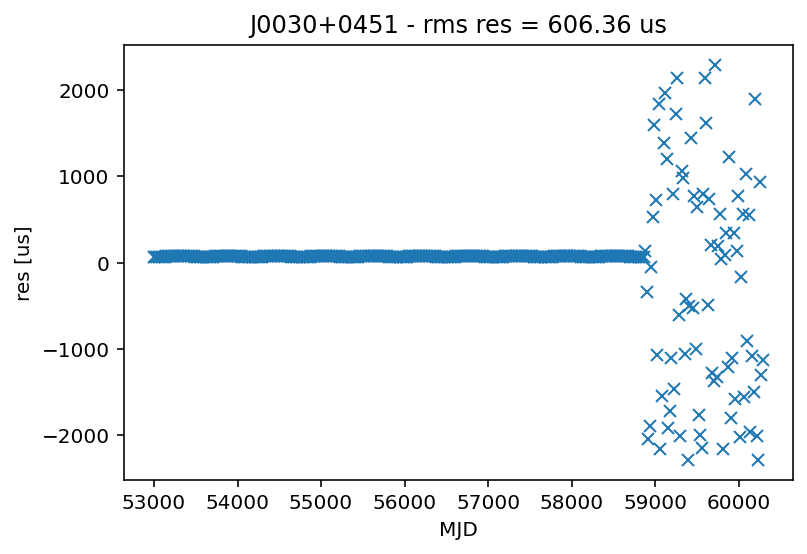

In [7]:
LP.plotres(psrs[0])